In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.datasets import mnist


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


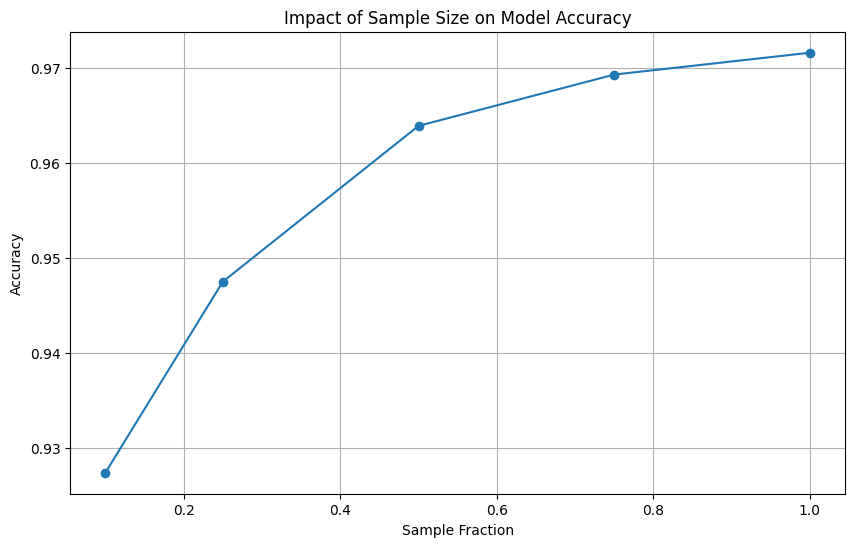

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
# Load the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Normalize data
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Function to create subsets based on sample size
def create_subset(X, y, sample_fraction):
    subset_size = int(len(X) * sample_fraction)
    indices = np.random.choice(len(X), subset_size, replace=False)
    return X[indices], y[indices]

# Function to create imbalanced datasets
def create_imbalanced_data(X, y, ratio):
    unique_classes = np.unique(y)
    X_balanced, y_balanced = [], []
    for cls in unique_classes:
        cls_indices = np.where(y == cls)[0]
        cls_sample_size = int(len(cls_indices) * ratio)
        selected_indices = np.random.choice(cls_indices, cls_sample_size, replace=False)
        X_balanced.append(X[selected_indices])
        y_balanced.append(y[selected_indices])
    return np.vstack(X_balanced), np.hstack(y_balanced)

# Define model
def build_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Evaluation for different sample sizes
sample_sizes = [0.1, 0.25, 0.5, 0.75, 1.0]
accuracy_results = []

for sample_fraction in sample_sizes:
    # Create subset
    X_train, y_train = create_subset(X_train_full, y_train_full, sample_fraction)

    # Build and train model
    model = build_model()
    model.fit(X_train, y_train, epochs=3, batch_size=32, verbose=0)

    # Evaluate
    y_pred = np.argmax(model.predict(X_test), axis=1)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results.append(acc)

# Plot results for sample size
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, accuracy_results, marker='o')
plt.title("Impact of Sample Size on Model Accuracy")
plt.xlabel("Sample Fraction")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# Evaluation for imbalanced class ratios
class_ratios = [1.0, 0.75, 0.5, 0.25, 0.1]
imbalance_results = []

for ratio in class_ratios:
    # Create imbalanced dataset
    X_train, y_train = create_imbalanced_data(X_train_full, y_train_full, ratio)

    # Build and train model
    model = build_model()
    model.fit(X_train, y_train, epochs=3, batch_size=32, verbose=0)

    # Evaluate

